In [ ]:
https://www.latlong.net/
    https://www.census.gov/

In [ ]:
!git clone https://github.com/CSSEGISandData/COVID-19.git

In [1]:
!git pull

remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Total 139 (delta 67), reused 67 (delta 67), pack-reused 72
Receiving objects: 100% (139/139), 668.45 KiB | 674.00 KiB/s, done.
Resolving deltas: 100% (87/87), completed with 12 local objects.
From https://github.com/CSSEGISandData/COVID-19
   6af1fed7..7b8a6cb4  master     -> origin/master
   605b3c04..a513a125  web-data   -> origin/web-data
Updating 6af1fed7..7b8a6cb4
Fast-forward
 csse_covid_19_data/README.md                     |  24 +
 csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv | 792 ++++++++++++-----------
 2 files changed, 421 insertions(+), 395 deletions(-)


In [2]:
!ls csse_covid_19_data/csse_covid_19_daily_reports/

01-22-2020.csv	02-06-2020.csv	02-21-2020.csv	03-07-2020.csv	03-22-2020.csv
01-23-2020.csv	02-07-2020.csv	02-22-2020.csv	03-08-2020.csv	03-23-2020.csv
01-24-2020.csv	02-08-2020.csv	02-23-2020.csv	03-09-2020.csv	03-24-2020.csv
01-25-2020.csv	02-09-2020.csv	02-24-2020.csv	03-10-2020.csv	03-25-2020.csv
01-26-2020.csv	02-10-2020.csv	02-25-2020.csv	03-11-2020.csv	03-26-2020.csv
01-27-2020.csv	02-11-2020.csv	02-26-2020.csv	03-12-2020.csv	03-27-2020.csv
01-28-2020.csv	02-12-2020.csv	02-27-2020.csv	03-13-2020.csv	03-28-2020.csv
01-29-2020.csv	02-13-2020.csv	02-28-2020.csv	03-14-2020.csv	03-29-2020.csv
01-30-2020.csv	02-14-2020.csv	02-29-2020.csv	03-15-2020.csv	03-30-2020.csv
01-31-2020.csv	02-15-2020.csv	03-01-2020.csv	03-16-2020.csv	03-31-2020.csv
02-01-2020.csv	02-16-2020.csv	03-02-2020.csv	03-17-2020.csv	04-01-2020.csv
02-02-2020.csv	02-17-2020.csv	03-03-2020.csv	03-18-2020.csv	04-02-2020.csv
02-03-2020.csv	02-18-2020.csv	03-04-2020.csv	03-19-2020.csv	README.md
02-04-2020.csv	02-19-2020.csv	

In [111]:
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "Florida" in line[2] and "-" in (line[6]):
        print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        

Florida Alachua US 2020-04-02 23:25:27 29.67866525 -82.35928158 95 0 0 0
Florida Baker US 2020-04-02 23:25:27 30.33060121 -82.28467476 11 0 0 0
Florida Bay US 2020-04-02 23:25:27 30.26548745 -85.62122584 15 0 0 0
Florida Bradford US 2020-04-02 23:25:27 29.95079741 -82.16611613 5 0 0 0
Florida Brevard US 2020-04-02 23:25:27 28.29409504 -80.73091022 49 0 0 0
Florida Broward US 2020-04-02 23:25:27 26.15184651 -80.48725556 1481 17 0 0
Florida Calhoun US 2020-04-02 23:25:27 30.40666734 -85.19394153 1 0 0 0
Florida Charlotte US 2020-04-02 23:25:27 26.90131002 -81.92949121 38 0 0 0
Florida Citrus US 2020-04-02 23:25:27 28.84804315 -82.47614748 27 2 0 0
Florida Clay US 2020-04-02 23:25:27 29.98319144 -81.85609986 58 6 0 0
Florida Collier US 2020-04-02 23:25:27 26.11091986 -81.34687065 178 2 0 0
Florida Columbia US 2020-04-02 23:25:27 30.22509788 -82.62160164 4 0 0 0
Florida Duval US 2020-04-02 23:25:27 30.33225875 -81.66976468 286 9 0 0
Florida Escambia US 2020-04-02 23:25:27 30.67652764 -87.3

# Prepare to draw the Plot

Max Latitude:  30.86747479
Min Latitude:  25.20904673
Max Longitude:  -80.43109784
Max Longitude:  -87.37284571


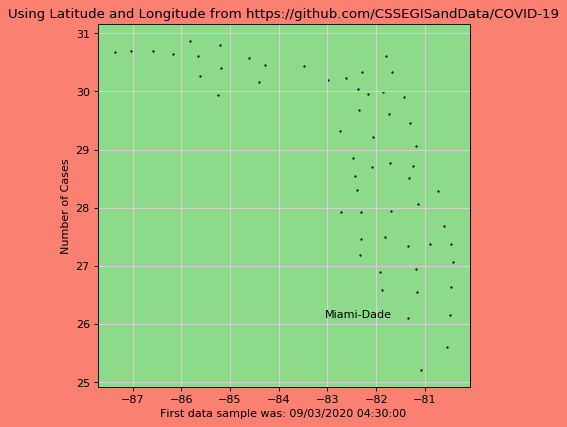

In [112]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))

fig = plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#s1= 'Miami-Dade'
#plt.text(.3, .8, s1, fontsize=12)
text(0.7, 0.2, 'Miami-Dade', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
s=1
#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)



plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()



 58
Max Latitude:  30.86747479
Min Latitude:  25.20904673
Max Longitude:  -80.43109784
Max Longitude:  -87.37284571
478.98060303
390.4315361399999


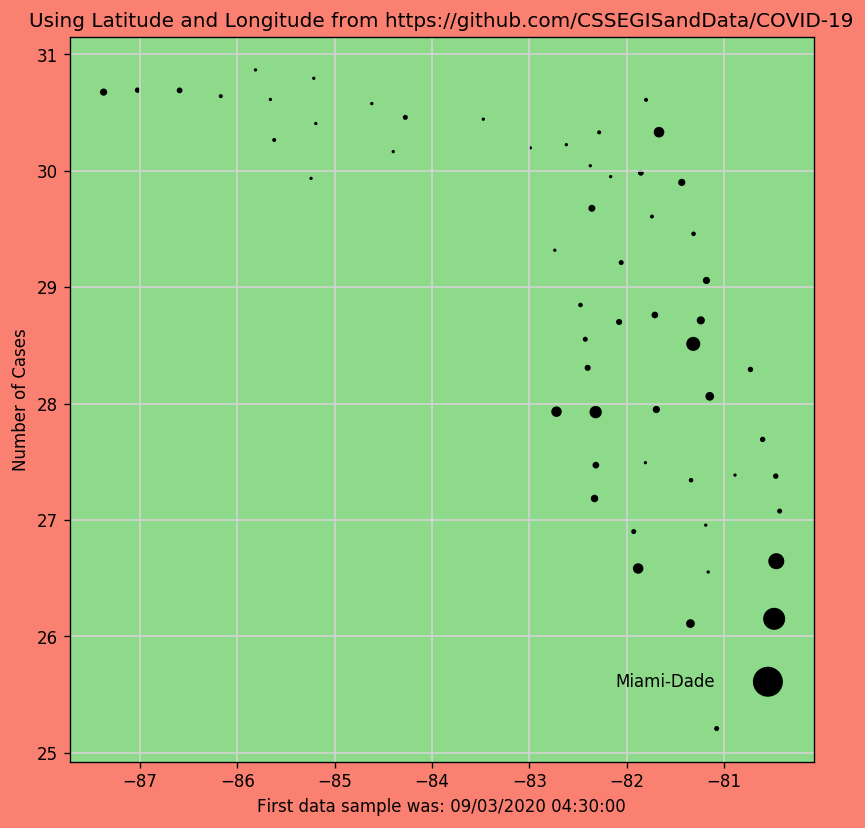

In [122]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "Florida" in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))
print((max(LG)-min(LG))*69)
print((max(LT)-min(LT))*69)

fig = plt.figure(num=None, figsize=(8,8), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

text(0.8, 0.11, 'Miami-Dade', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

# OHIO



 74
Max Latitude:  41.70860332
Min Latitude:  38.59743452
Max Longitude:  -80.74830218
Max Longitude:  -84.64787018
269.07019200000013
214.6706472000001


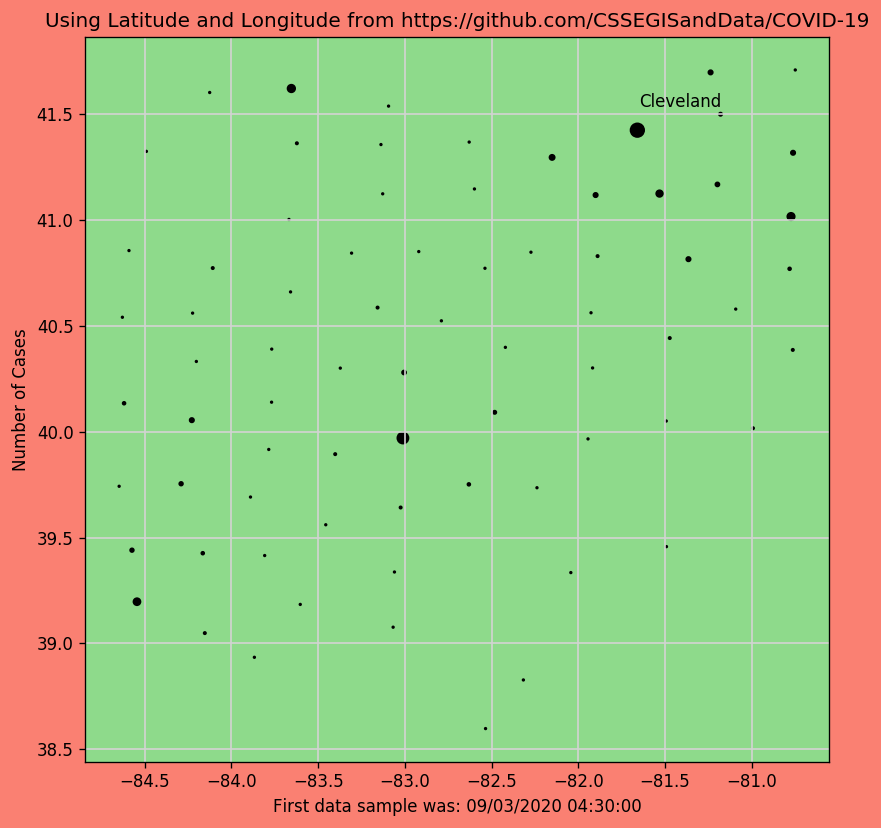

In [125]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "Ohio" in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))
print((max(LG)-min(LG))*69)
print((max(LT)-min(LT))*69)

fig = plt.figure(num=None, figsize=(8,8), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

text(0.8, 0.91, 'Cleveland', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()



 58
Max Latitude:  44.74530905
Min Latitude:  40.74066522
Max Longitude:  -72.8012172
Max Longitude:  -79.36691763
4.14
2.76


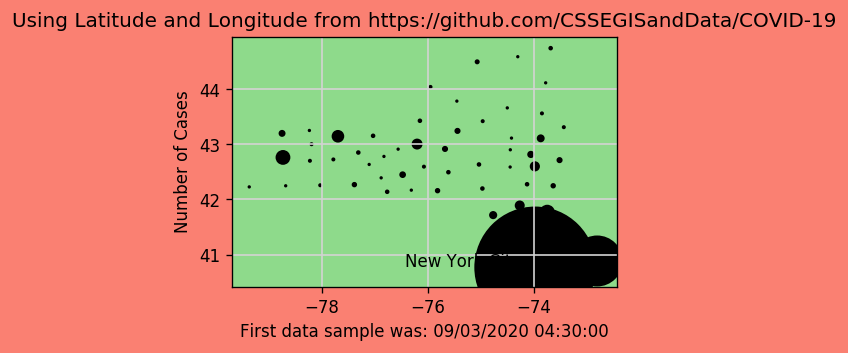

In [137]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "New York" in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))
print(int(max(LG)-min(LG))*.69)
print(int(max(LT)-min(LT))*.69)

H = (int(max(LG)-min(LG))*.69)
V = (int(max(LT)-min(LT))*.69)

fig = plt.figure(num=None, figsize=(H,V), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

text(0.6, 0.1, 'New York City', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()



 50
Max Latitude:  41.59198861
Min Latitude:  33.03484597
Max Longitude:  -115.36690420000001
Max Longitude:  -123.876044
5.52
5.52


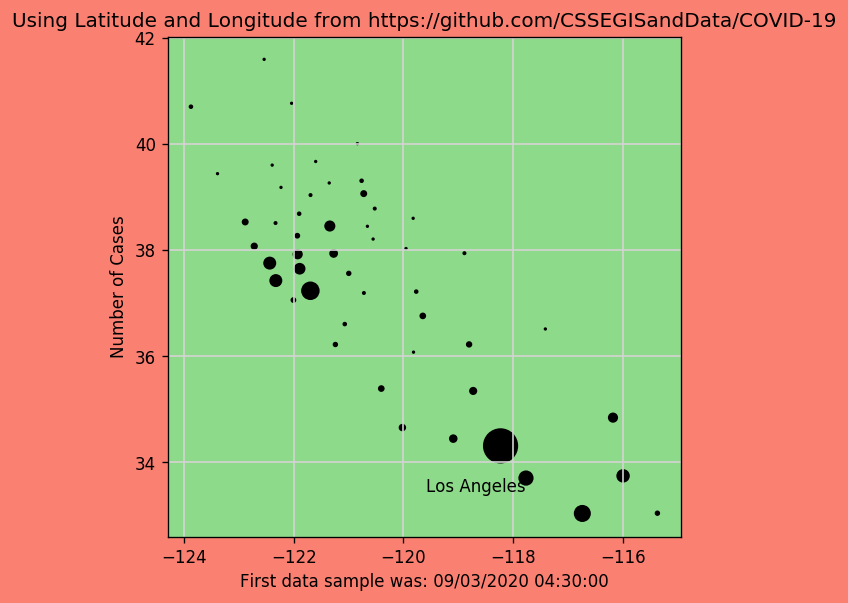

In [139]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "California" in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))
print(int(max(LG)-min(LG))*.69)
print(int(max(LT)-min(LT))*.69)

H = (int(max(LG)-min(LG))*.69)
V = (int(max(LT)-min(LT))*.69)

fig = plt.figure(num=None, figsize=(H,V), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

text(0.6, 0.1, 'Los Angeles', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()



 34
Max Latitude:  48.82227976
Min Latitude:  45.77568046
Max Longitude:  -117.4046494
Max Longitude:  -123.92263190000001
4.14
2.07
Factor: 2.0


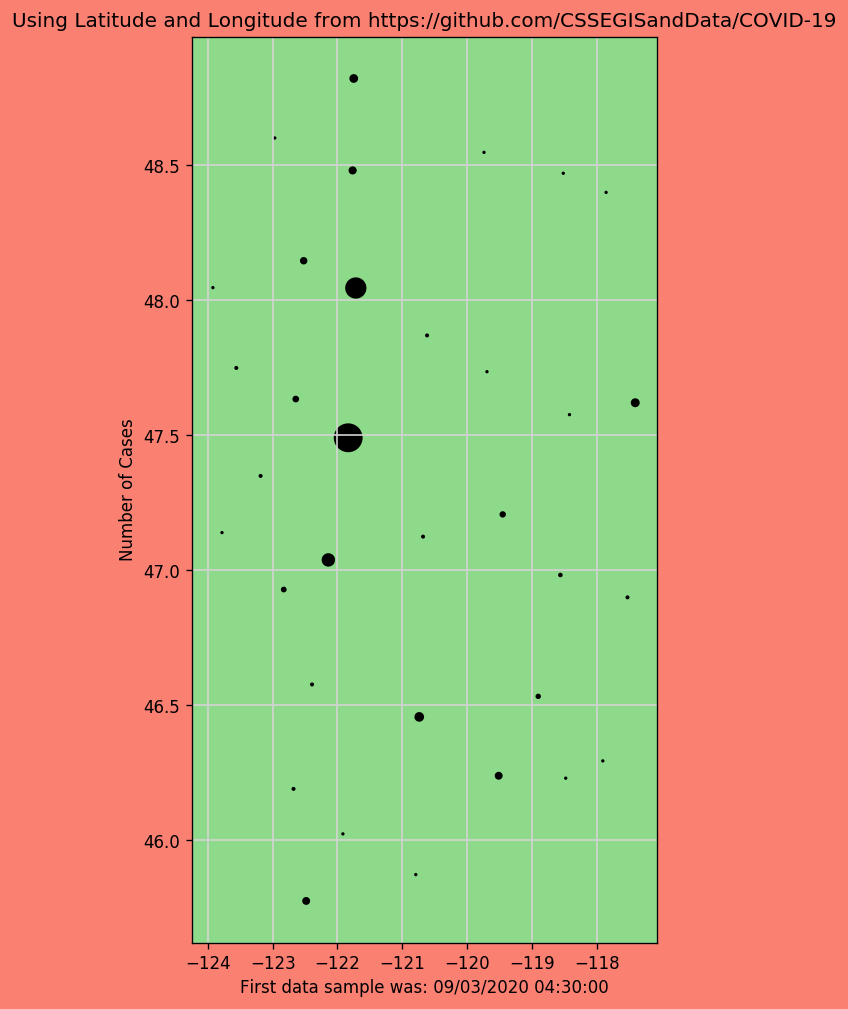

In [154]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "Washington" in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))
print(int(max(LG)-min(LG))*.69)
print(int(max(LT)-min(LT))*.69)

H = (int(max(LG)-min(LG))*.69)
V = (int(max(LT)-min(LT))*.69)
Factor=round((H/V),3)
print("Factor:",Factor)
fig = plt.figure(num=None, figsize=(5,5*Factor), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#text(0.6, 0.1, 'Los Angeles', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

Max Latitude:  30.86747479
Min Latitude:  25.20904673
Max Longitude:  -80.43109784
Max Longitude:  -87.37284571
478.98060303
390.4315361399999


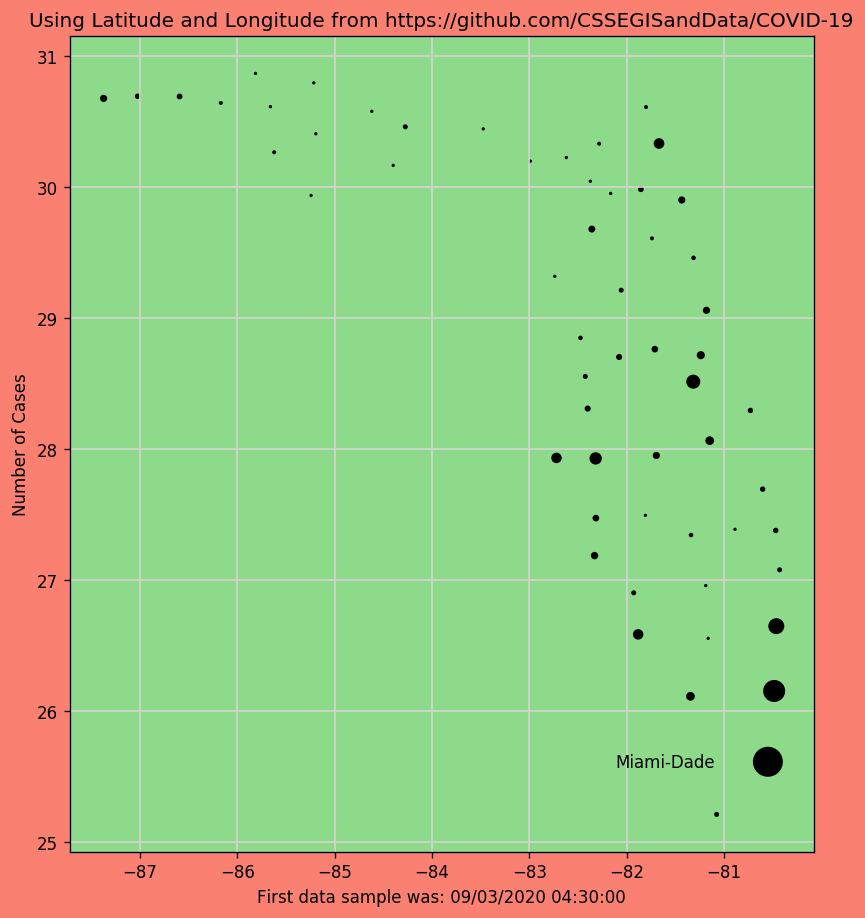

In [118]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))
print((max(LG)-min(LG))*69)
print((max(LT)-min(LT))*69)

fig = plt.figure(num=None, figsize=(8,9), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

text(0.8, 0.11, 'Miami-Dade', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

(-0.2, 3)

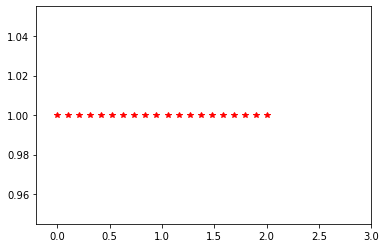

In [49]:
import numpy as geek 
import pylab as p 
  
# Start = 0 
# End = 2 
# Samples to generate = 10 
x1 = geek.linspace(0, 2, 20, endpoint = "False") 
y1 = geek.ones(20) 
  
p.plot(x1, y1, '*', color='red') 
p.xlim(-0.2, 3) 

58
-82.28467476
-85.66002461
----------------
30.86747479
25.20904673
-80.43109784
-87.37284571
----------------
31.36747479
25.70904673
-87.87284571
-80.93109784


(25.70904673, 31.36747479)

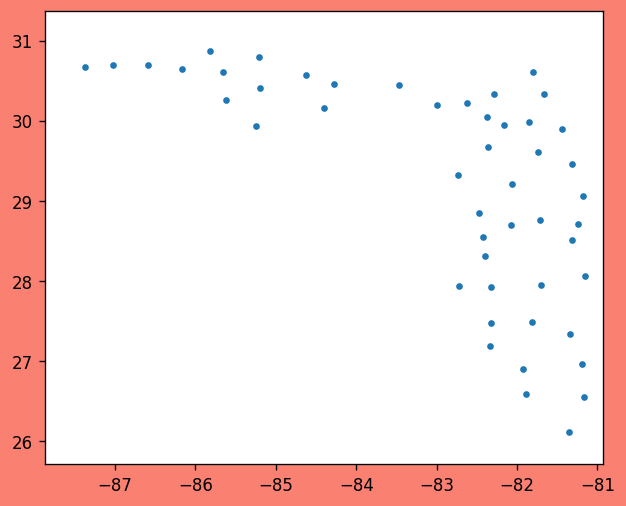

In [72]:
import numpy as geek 
import pylab as p 
print (len(LG))
lg= len(LG)
print (LG[1])
print (LG[-1])
print("----------------")
print (max(LT))
print (min(LT))
print (max(LG))
print (min(LG))
print("----------------")
ylim0=(max(LT))+.5
ylim1=(min(LT))+.5
xlim1=max(LG)-.5
xlim0=min(LG)-.5

print(ylim0)
print(ylim1)
print(xlim0)
print(xlim1)
fig = plt.figure(num=None, figsize=(6,5), dpi=120, facecolor='salmon')



# Start = 0 
# End = 2 
# Samples to generate = 10 
x1 = geek.linspace(0, 2, 10, endpoint = False) 
y1 = geek.ones(10) 
  
p.plot(LG, LT, '.') 
p.xlim(xlim0, xlim1) 
p.ylim(ylim1, ylim0) 

<Figure size 800x960 with 0 Axes>

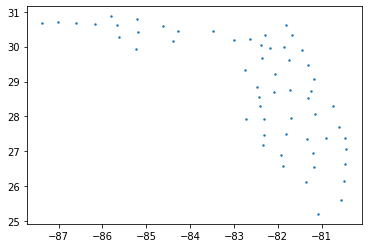

In [29]:
w = 10
h = 12
d = 80
plt.figure(figsize=(w, h,), dpi=d)
fig, ax = plt.subplots()
ax.scatter(LG, LT, s=2)

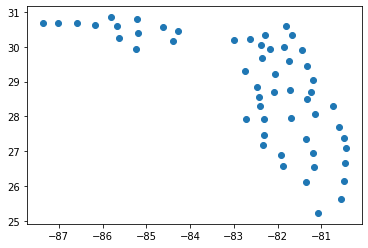

In [104]:
#y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
#z = [0.15, 0.3, 0.45, 0.6, 0.75]
#txt = 'Dade'
ax.axis([-88, -80, 24, 31])

ax.text(25,81, ". Data: (1, 5)", transform=ax.transData)
ax.text(85, 26, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(87, 27, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

fig, ax = plt.subplots()
#ax.annotate(txt, (3, 3))
ax.scatter(x, y)




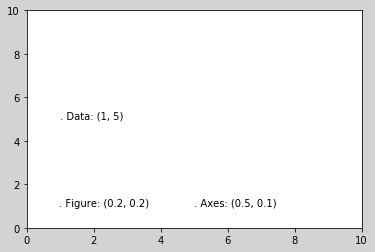

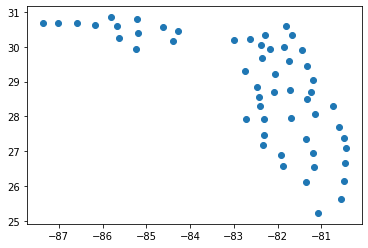

In [101]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);
fig, ax = plt.subplots()
#ax.annotate(txt, (3, 3))
ax.scatter(x, y)

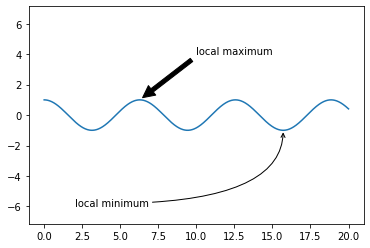

In [93]:
%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));


# Position Text
https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html

Max Latitude:  30.86747479
Min Latitude:  25.20904673
Max Longitude:  -80.43109784
Max Longitude:  -87.37284571


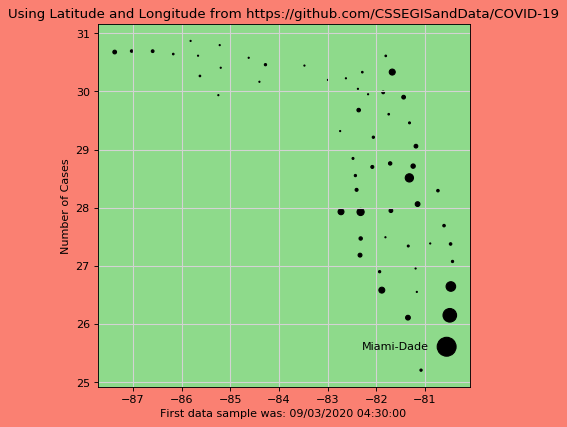

In [26]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print ("Max Latitude: ",max(LT))
print ("Min Latitude: ",min(LT))
print ("Max Longitude: ",max(LG))
print ("Max Longitude: ",min(LG))

fig = plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

text(0.8, 0.11, 'Miami-Dade', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.grid(True)

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

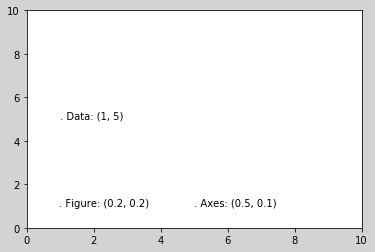

In [83]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);


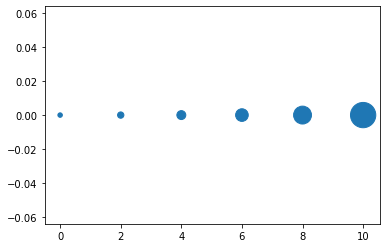

In [66]:
# doubling the width of markers
x = [0,2,4,6,8,10]
y = [0]*len(x)
s = [20*2**n for n in range(len(x))]
plt.scatter(x,y,s=s)
plt.show()

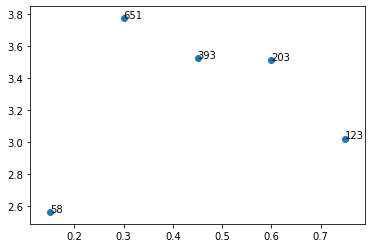

In [87]:
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
n = [58, 651, 393, 203, 123]

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [ ]:
14.5995° N, 120.9842° E

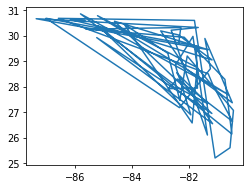

In [96]:
import matplotlib.pyplot as plt
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)
x = LG
y = LT
x_pos = 1
y_pos = 2
#plt.text(x_pos, y_pos, "text on plot")

plt.plot(x,y)

In [20]:
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    print(int(S))
s = np.array(Size)

10
2
2
1
5
149
1
4
3
6
18
1
29
11
3
1
1
1
1
1
4
3
41
1
5
1
9
28
4
1
1
9
4
4
289
4
2
6
1
55
18
74
7
28
11
2
5
12
15
11
5
7
1
1
11
1
2
1


In [12]:
s = [.1*n for n in range(len(cases))]
for I in s:
    print (int(I))

0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5


// Generated by graph-tools (version 1.0) at 2020/56/04/04/20 12:56:18
// directed, 4 vertices, 2 edges
digraph export_dot {
  node [color=gray90,style=filled];
  "1";
  "2";
  "3";
  "4";
  "1" -> "2";
  "2" -> "3";
}

{1: 0, 2: 1, 3: 2}
True
1694.8787424993304


In [7]:
#! /usr/bin/env python

# We will need some things from several places
from __future__ import division, absolute_import, print_function
from graph_tools import Graph
from graph_tools import *
import sys
if sys.version_info < (3,):
    range = xrange
import os
from pylab import *  # for plotting
from numpy.random import *  # for random sampling
seed(42)

# We need to import the graph_tool module itself


# let's construct a Price network (the one that existed before Barabasi). It is
# a directed network, with preferential attachment. The algorithm below is
# very naive, and a bit slow, but quite simple.

# We start with an empty, directed graph
g = Graph()

# We want also to keep the age information for each vertex and edge. For that
# let's create some property maps
v_age = g.new_vertex_property("int")
e_age = g.new_edge_property("int")

# The final size of the network
N = 100000

# We have to start with one vertex
v = g.add_vertex()
v_age[v] = 0

# we will keep a list of the vertices. The number of times a vertex is in this
# list will give the probability of it being selected.
vlist = [v]

# let's now add the new edges and vertices
for i in range(1, N):
    # create our new vertex
    v = g.add_vertex()
    v_age[v] = i

    # we need to sample a new vertex to be the target, based on its in-degree +
    # 1. For that, we simply randomly sample it from vlist.
    i = randint(0, len(vlist))
    target = vlist[i]

    # add edge
    e = g.add_edge(v, target)
    e_age[e] = i

    # put v and target in the list
    vlist.append(target)
    vlist.append(v)

# now we have a graph!

# let's do a random walk on the graph and print the age of the vertices we find,
# just for fun.

v = g.vertex(randint(0, g.num_vertices()))
while True:
    print("vertex:", int(v), "in-degree:", v.in_degree(), "out-degree:",
          v.out_degree(), "age:", v_age[v])

    if v.out_degree() == 0:
        print("Nowhere else to go... We found the main hub!")
        break

    n_list = []
    for w in v.out_neighbors():
        n_list.append(w)
    v = n_list[randint(0, len(n_list))]

# let's save our graph for posterity. We want to save the age properties as
# well... To do this, they must become "internal" properties:

g.vertex_properties["age"] = v_age
g.edge_properties["age"] = e_age

# now we can save it
g.save("price.xml.gz")


# Let's plot its in-degree distribution
in_hist = vertex_hist(g, "in")

y = in_hist[0]
err = sqrt(in_hist[0])
err[err >= y] = y[err >= y] - 1e-2

figure(figsize=(6,4))
errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="in")
gca().set_yscale("log")
gca().set_xscale("log")
gca().set_ylim(1e-1, 1e5)
gca().set_xlim(0.8, 1e3)
subplots_adjust(left=0.2, bottom=0.2)
xlabel("$k_{in}$")
ylabel("$NP(k_{in})$")
tight_layout()
savefig("price-deg-dist.pdf")
savefig("price-deg-dist.svg")

AttributeError: 'Graph' object has no attribute 'new_vertex_property'

In [8]:
help(Graph)

Help on class Graph in module graph_tools:

class Graph(builtins.object)
 |  Graph(directed=True, multiedged=True)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, directed=True, multiedged=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  add_edge(self, u, v)
 |      Add an edge from vertex U to vertex V.
 |  
 |  add_edge_get_id = add_edge(self, u, v)
 |  
 |  add_vertex(self, v)
 |      Attach vertex V to the graph if it does not exist.
 |  
 |  add_vertices(self, *vertices)
 |      Attach vertices VERTICES to the graph while avoiding duplicates.
 |  
 |  adjacency_matrix(self)
 |      Return the adjacency matrix of the graph as NumPy.ndarray
 |      object.
 |  
 |  adjacency_matrix_eigvals(self)
 |      Return eigenvalues of the adjacency matrix.
 |  
 |  algebraic_connectivity(self)
 |      Return the argebraic connectivity from spectral graph theory.
 |  
 |  average_degree(self)
 |     

In [15]:
Help="""
Help on class Graph in module graph_tools:

class Graph(builtins.object)
 |  Graph(directed=True, multiedged=True)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, directed=True, multiedged=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  add_edge(self, u, v)
 |      Add an edge from vertex U to vertex V.
 |  
 |  add_edge_get_id = add_edge(self, u, v)
 |  
 |  add_vertex(self, v)
 |      Attach vertex V to the graph if it does not exist.
 |  
 |  add_vertices(self, *vertices)
 |      Attach vertices VERTICES to the graph while avoiding duplicates.
 |  
 |  adjacency_matrix(self)
 |      Return the adjacency matrix of the graph as NumPy.ndarray
 |      object.
 |  
 |  adjacency_matrix_eigvals(self)
 |      Return eigenvalues of the adjacency matrix.
 |  
 |  algebraic_connectivity(self)
 |      Return the argebraic connectivity from spectral graph theory.
 |  
 |  average_degree(self)
 |      Return the average degree of all vertices in the graph.
 |  
 |  betweenness(self, v)
 |      Return the betweenness centrality for vertex v.  This program
 |      implements Algorithm 1 (betweenness centrality in unweighted graphs)
 |      in U. Brandes, `A Fast Algorithm for Betweeness Centrality,' Journal
 |      of Mathematical Sociology, 2001.
 |  
 |  complete_graph(self)
 |      Add edges to all vertex pairs to make the graph fully-meshed.
 |  
 |  components(self)
 |      Return all components (i.e., connected subgraphs) of the graph.
 |      Components are returned as list of vertices set.
 |  
 |  copy_graph(self, directed=None)
 |      Return a copy of the graph.
 |  
 |  create_barabasi_graph(self, N=10, m0=2, m=2)
 |  
 |  create_barabasi_random_graph(self, N=10, E=20, m0=2)
 |  
 |  create_btree_graph(self, N=10)
 |      # binary tree graph
 |  
 |  create_configuration_graph(self, degree_seq=None)
 |      Generate a graph using Newman's configuration model.  DEGREE_SEQ is
 |      a list of degrees for every vertex.  Different from common
 |      implementations, this code never generates self-loops and multi-edges.
 |  
 |  create_degree_bounded_graph(self, N=10, E=20)
 |      Generate a DB (Degree-Bounded) random network with N vertices and E
 |      edges.  For details of the algorithm, refer to K. Yamashita et al.,
 |      `Revisiting the Robustness of Complex Networks against Random Node
 |      Removal,' Journal of Information Processing, 2019.
 |  
 |  create_erdos_renyi_graph(self, N=100, p=0.04)
 |  
 |  create_generalized_barabasi_graph(self, N=10, m0=2, m=2, gamma=3)
 |      # Generalized BA model proposed in S. N. Dorogovtsev, ``Structure of
 |      # growing networks with preferential linking,'' Phisical Review
 |      # Letters, vol. 85, no. 21, pp. 4633 -= 14636, Nov. 2000.
 |  
 |  create_graph(self, atype, *args)
 |      # create ----------------------------------------------------------------
 |  
 |  create_latent_graph(self, N=10, E=20, error_ratio=0, confer='linear', dist='normal', alpha=10)
 |  
 |  create_lattice_graph(self, dim=2, n=5, is_torus=False)
 |  
 |  create_li_maini_graph(self, T=200, M=4, m0=4, m=1, alpha=0.1, n=1)
 |      Create a graph with M clusters using the evolutionary network
 |      generation model: C. Li and P. K. Maini, ``An evolving network model
 |      with community structure,'' Journal of Physics, 2005.  
 |      
 |      Parameters:
 |        T: the number of steps
 |        M: the number of initial communities
 |        m0: the number of vertices in each initial community
 |        m: the number inner-edges added per every step
 |        alpha: the probability of adding inter-edges
 |        n: the number of inter-edges added per every step
 |  
 |  create_random_graph(self, N=10, E=20, no_multiedge=False)
 |  
 |  create_random_regular_graph(self, N=10, k=3)
 |  
 |  create_random_sparse_graph(self, N=10, E=20, no_multiedge=False)
 |  
 |  create_ring_graph(self, N=10, step=1)
 |  
 |  create_tree_graph(self, N=10)
 |  
 |  create_treeba_graph(self, N=10, alpha=1)
 |      # tree BA graph
 |  
 |  create_voronoi_graph(self, npoints=10, width=1, height=1)
 |  
 |  degree(self, v)
 |      Return the number of edges connected to vetex V.
 |  
 |  delete_edge(self, u, v)
 |      Delete an edge between vertices U and V.  If vertices are connected
 |      with multiple edges, the one with the largest edge identifier is
 |      deleted.
 |  
 |  delete_vertex(self, v)
 |      Delete vertex V from the graph.  All incoming/outgoing edges are
 |      deleted.
 |  
 |  delete_vertices(self, alist)
 |      Delete all vertices ALST.
 |  
 |  diagonal_matrix(self)
 |      Return the diagonal matrix of the graph as NumPy.ndarray object.
 |  
 |  dijkstra(self, s)
 |      Compute all shortest paths from source vertex S using Dijkstra's
 |      algorithm.  Return two dictionaries: DIST and PREV.  Dictionary DIST
 |      records the distance to every vertex in the graph, and dictionary PREV
 |      records the *previous* node along the shortest-path tree from source
 |      vertex S.  For instance, DIST['4'] indicates the number of hops from
 |      source vertex S to vertex '4'.  PREV['4'] indicates the preceeding
 |      vertex in the shortest path from source vertex S to vertex 4.  You can
 |      obtain the shortest path to vertex V by traversing dictionary PREV
 |      from vertex V back to source node S.
 |  
 |  dijkstra_all_pairs(self)
 |      Compute all-pairs shortest paths using Dijkstra's algorithm.
 |  
 |  directed(self)
 |  
 |  directed_copy(self)
 |      Return a directed copy of the graph.
 |  
 |  edges(self)
 |      Return all edges in the graph as a list.
 |  
 |  edges_at(self, v)
 |      Return the list of all edges connected to vertex V.
 |  
 |  edges_from(self, u, ignore=False)
 |      Return the list of edges leaving from vertex U.  This method fails
 |      if the graph is undirected.  Error checking is bypassed if
 |      IGNORE is true.
 |  
 |  edges_to(self, v, ignore=False)
 |      Return the list of edges coming to vertex U.  This method fails
 |      if the graph is undirected.  Error checking is bypassed if
 |      IGNORE is true.
 |  
 |  effective_resistance(self)
 |      Return the effective resistance from spectral graph theory.
 |  
 |  expect_directed(self)
 |  
 |  expect_multiedged(self)
 |  
 |  expect_undirected(self)
 |  
 |  explore(self, s)
 |      Return the list of all vertices reachable from vertex S.
 |  
 |  export_cell(self, *args)
 |  
 |  export_dot(self, *args)
 |  
 |  export_graph(self, fmt, *args)
 |      # ----------------------------------------------------------------
 |  
 |  floyd_warshall(self)
 |      Compute all-pairs shortest paths using Floyd-Warshall algorithm.
 |  
 |  get_edge_attribute_by_id(self, u, v, n, attr)
 |      Return the attribute of the N-th edge between vertices U and V
 |      named ATTR.
 |  
 |  get_edge_attributes_by_id(self, u, v, n)
 |      Return all attributes of the N-th edge between vertices U and V as
 |      dictionary.
 |  
 |  get_edge_count(self, u, v)
 |      Return the number of multi-edges connecting vertices U and V.
 |  
 |  get_edge_weight(self, u, v)
 |      Return the weight of the first edge between vertices U and V to
 |      weight
 |      W.
 |  
 |  get_edge_weight_by_id(self, u, v, n)
 |      Return the edge weight of the N-th edge between vertices U and
 |      V.
 |  
 |  get_graph_attribute(self, attr)
 |      Extract and return the graph attribute named ATTR.  Return None if
 |      the attribute does not exist.
 |  
 |  get_multiedge_ids(self, u, v)
 |      Return the edge identifiers (starting from zero) of edges between
 |      vertex U and vertex V as a list.  For instance, two vertices connected
 |      by a single edge yields [0].  Note that the order of edge identifers
 |      are random.
 |  
 |  get_vertex_attribute(self, v, attr)
 |      Return the vertex attribute of vetex V named ATTR.
 |  
 |  get_vertex_attributes(self, v)
 |      Return all vertex attributes of vertex V as dictionary.
 |  
 |  get_vertex_weight(self, v)
 |      Return the vertex weight of vertex V.
 |  
 |  has_edge(self, u, v)
 |      Check if the graph has edge (u, v).
 |  
 |  has_vertex(self, v)
 |      Check if vertex V exists in the graph.
 |  
 |  header_string(self, comment='# ')
 |      # util ----------------------------------------------------------------
 |  
 |  import_dot(self, lines)
 |  
 |  import_graph(self, fmt, *args)
 |      # import ----------------------------------------------------------------
 |  
 |  in_degree(self, v, ignore=False)
 |      Return the number incoming edges connected to vertex V.  This
 |      method fails if the graph is undirected.  Error checking is bypassed
 |      if IGNORE is true.
 |  
 |  in_edges = edges_to(self, v, ignore=False)
 |  
 |  is_connected(self)
 |      Check if all vertices in the graph are mutually connected.
 |  
 |  is_directed = directed(self)
 |  
 |  is_multiedged = multiedged(self)
 |  
 |  is_reachable(self, u, v)
 |      Check if any path exists from vertex U to vertex V.
 |  
 |  is_undirected = undirected(self)
 |  
 |  laplacian_matrix(self)
 |      Return the Laplacian matrix of the graph as NumPy.ndarray
 |      object.
 |  
 |  laplacian_matrix_eigvals(self)
 |      Return eigenvalues of the Laplacian matrix.
 |  
 |  maximal_component(self)
 |      Return the largest component (i.e., the component with the largest
 |      number of vertices).
 |  
 |  multiedged(self)
 |  
 |  natural_connectivity(self)
 |      Return the natural connectivity from spectral graph theory.
 |  
 |  neighbors(self, v)
 |      Return all neighbor nodes of vetex V.
 |  
 |  out_degree(self, u, ignore=False)
 |      Return the number outgoing edges connected to vertex U.  This
 |      method fails if the graph is undirected.  Error checking is bypassed
 |      if IGNORE is true.
 |  
 |  out_edges = edges_from(self, u, ignore=False)
 |  
 |  predecessors(self, v, ignore=False)
 |      Return the list of predecessor vertices of vetex V.  This method
 |      fails if the graph is undirected.  Error checking is bypassed if
 |      IGNORE is true.
 |  
 |  random_edge(self)
 |      Randomly choose an edge from all edges.
 |  
 |  random_vertex(self)
 |      Randomly choose a vertex from all vertices.
 |  
 |  set_edge_attribute_by_id(self, u, v, n, attr, val)
 |      Define the attribute of the N-th edge between vertices U and V
 |      named ATTR as value VAL.
 |  
 |  set_edge_attributes_by_id(self, u, v, n, adict)
 |      Define attributes of the N-th edge between vertices U and V from
 |      dictionary ADICT.
 |  
 |  set_edge_weight(self, u, v, w)
 |      Set the weight of the first edge between vertices U and V to weight
 |      W.
 |  
 |  set_edge_weight_by_id(self, u, v, n, val)
 |      Set the edge weight of the N-th edge between vertices U and V to
 |      value VAL.
 |  
 |  set_graph_attribute(self, attr, val)
 |      Define the graph attribute ATTR as value VAL.
 |  
 |  set_vertex_attribute(self, v, attr, val)
 |      Define the vertex attribute of vetex V named ATTR as value VAL.
 |  
 |  set_vertex_attributes(self, v, adict)
 |      Set multiple vertex attributes of vertex V.  Attributes are passed
 |      by dictionary ADICT.
 |  
 |  set_vertex_weight(self, v, val)
 |      Set the weight of vertex V to VAL.  The vertex weight is stored in
 |      vertex attributes with the name 'weight'.
 |  
 |  shortest_paths(self, s, t)
 |      Return the all shortest-paths from vertex S to vertex T.  Note that
 |      the shortest path tree from source vertex S is cached for efficiency.
 |      So, if the network topology is changed since the previous invocation
 |      of shortest_paths(), you must explicitly call dijkstra() to renew the
 |      shorte-path tree cache.
 |  
 |  spanning_tree_count(self)
 |      Return the spanning tree count from spectral graph theory.
 |  
 |  spectral_gap(self)
 |      Return the spectral gap from spectral graph theory.
 |  
 |  spectral_radius(self)
 |      Return the spectral raduis from spectral graph theory.
 |  
 |  successors(self, u, ignore=False)
 |      Return the list of successor vertices of vetex V.  This method
 |      fails if the graph is undirected.  Error checking is bypassed if
 |      IGNORE is true.
 |  
 |  undirected(self)
 |  
 |  unique_edges(self)
 |      Return all unique edges in the graph as a list.  All multi-edges
 |      are unified into a single edge.
 |  
 |  vertex_degree = degree(self, v)
 |  
 |  vertices(self)
 |      Return all vertices in the graph as a list.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
"""
Help =Help.split("\n")
TOPIC = 'edge'
for line in Help:
    if TOPIC in line:
        print (line)

 |  Graph(directed=True, multiedged=True)
 |  __init__(self, directed=True, multiedged=True)
 |  add_edge(self, u, v)
 |      Add an edge from vertex U to vertex V.
 |  add_edge_get_id = add_edge(self, u, v)
 |      Add edges to all vertex pairs to make the graph fully-meshed.
 |      implementations, this code never generates self-loops and multi-edges.
 |      edges.  For details of the algorithm, refer to K. Yamashita et al.,
 |        m: the number inner-edges added per every step
 |        alpha: the probability of adding inter-edges
 |        n: the number of inter-edges added per every step
 |  create_random_graph(self, N=10, E=20, no_multiedge=False)
 |  create_random_sparse_graph(self, N=10, E=20, no_multiedge=False)
 |      Return the number of edges connected to vetex V.
 |  delete_edge(self, u, v)
 |      Delete an edge between vertices U and V.  If vertices are connected
 |      with multiple edges, the one with the largest edge identifier is
 |      Delete vertex V from t

In [ ]:
v_age = g.new_vertex_property("int")
      e_age = g.new_edge_property("int")
      

AttributeError: 'Graph' object has no attribute 'new_vertex_property'


In [88]:
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
cnt=0
for line in DataIn:
    cnt=cnt+1
    if cnt==1:print(line)
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if "Germany" in line:
        if (len(line))==9:print(line[0],line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        longitude = longitude+line[6]+","

FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key

Germany 2020-04-02 23:25:14 51.165690999999995 10.451526 84794 1107 22440 61247 Germany


# List all Countries

In [101]:
LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
longitude = ""
cnt=0
Cnt=0
for line in DataIn:
    cnt=cnt+1
    if cnt==1:print(line)
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if (len(line))==9:Cnt=Cnt+1
    if (len(line))==9 and len(line[1])>4:
        print(line[0],line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
    STATES.append(text)
    LAT.append(line[5])
    LONG.append(line[6])
    cases.append(line[7])
    longitude = longitude+line[6]+","
print(Cnt)

FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key

Afghanistan 2020-04-02 23:25:14 33.93911 67.709953 273 6 10 257 Afghanistan
Albania 2020-04-02 23:25:14 41.1533 20.1683 277 16 76 185 Albania
Algeria 2020-04-02 23:25:14 28.0339 1.6596 986 86 61 839 Algeria
Andorra 2020-04-02 23:25:14 42.5063 1.5218 428 15 10 403 Andorra
Angola 2020-04-02 23:25:14 -11.2027 17.8739 8 2 1 5 Angola
Antigua and Barbuda 2020-04-02 23:25:14 17.0608 -61.7964 9 0 0 9 Antigua and Barbuda
Argentina 2020-04-02 23:25:14 -38.4161 -63.6167 1133 36 256 841 Argentina
Armenia 2020-04-02 23:25:14 40.0691 45.0382 663 7 33 623 Armenia
Austria 2020-04-02 23:25:14 47.5162 14.5501 11129 158 1749 9222 Austria
Azerbaijan 2020-04-02 23:25:14 40.1431 47.5769 400 5 26 369 Azerbaijan
Bahamas 2020-04-02 23:25:14 25.025885 -78.035889 24 1 1 22 Bahamas
Bahrain 2020-04-02 23:25:14 26.0275 50.55 643 4 381 258 Bahrain
Bangladesh 2020-04-02 23:25:14 23.685 90.3563 56 6 25 25 Ba

In [ ]:
https://anthonylouisdagostino.com/bounding-boxes-for-all-us-states/